In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [3]:
data=pd.read_csv('baseball.csv')
data

,Points,Assists,Rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


In [4]:
#np.sum because we are doing this for each feature in x1 and x2
def euclidean_dis(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def manhattan_dis(x1,x2):
    return np.sum(np.abs(x1-x2))

def minkowski_dis(x1,x2,p):
    return np.power(np.sum((x1-x2)**p),1/p)
    

In [20]:
def k_means(data,k,distance_func): 
    centroids=data.sample(n=k,random_state=42).values
    print(centroids)
    prev_centroids=np.zeros(centroids.shape)

    while not np.all(centroids==prev_centroids): 
        prev_centroids=centroids.copy()

        clusters=[]
        for point in data.values: 
            distances=[distance_func(point,centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))

       
        centroids=[]
        for i in range(k): 
            cluster_mean=data.values[np.array(clusters)==i].mean(axis=0)
            centroids.append(cluster_mean)

        
        # centroids = []
        # for i in range(len(prev_centroids)):
        #     temp = 0
        #     c = 0
        #     for ind,j in enumerate(data.values):
        #         if clusters[ind] != i:
        #             continue
        #         temp  += j
        #         c+=1
        #     if c == 0:
        #         centroids.append(prev_centroids[i])
        #     else:
        #         centroids.append(temp/c)

        print(centroids)
        return np.array(clusters),np.array(centroids)
    

In [22]:
def SSE(data, clusters, centroids): 
    sse=0
    #range is k basically
    for i in range(len(centroids)): 
        sse+=np.sum((data.values[clusters==i]-centroids[i])**2)
    return sse

In [24]:
def plot_clusters(data, clusters, centroids,k,distance_name): 
    plt.figure(figsize=(8,6)) 
    plt.scatter(data['Points'],data['Assists'],c=clusters, cmap='plasma')
    plt.scatter(centroids[: ,0],centroids[:,1],s=300,c='red',marker='X')
    plt.title(f'K-means Clusters with K={k} with {distance_name} distance')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()

In [26]:
def elbow_method(data,k_values,distance_func,dist_name): 
    sse_values=[]
   
    for k in k_values: 
        clusters, centroids=k_means(data,k,distance_func)
        sse=SSE(data,clusters,centroids)
        sse_values.append(sse)
        plot_clusters(data,clusters,centroids,k,dist_name)
    print("SSE values are",sse_values)
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_values, marker='o')
    plt.title(f'Elbow Method for Optimal K ({dist_name} Distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

[[18.  3. 15.]]
[array([23.94444444,  7.61111111,  8.61111111])]


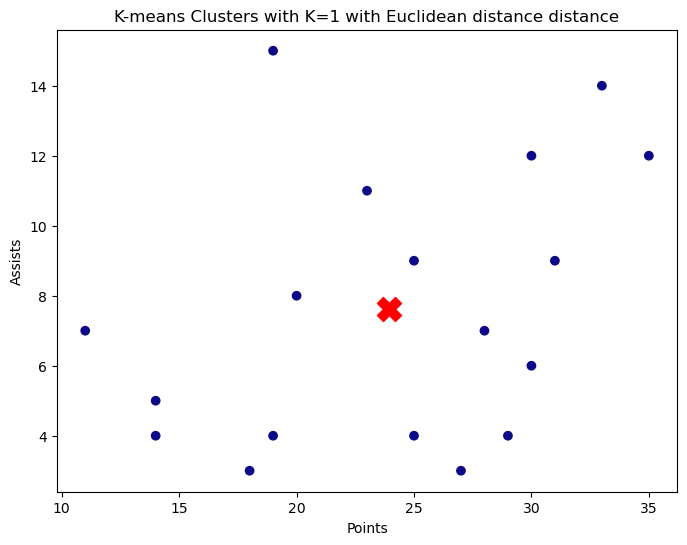

[[18.  3. 15.]
 [19.  4. 14.]]
[array([14.5,  5. , 14.5]), array([25.125 ,  7.9375,  7.875 ])]


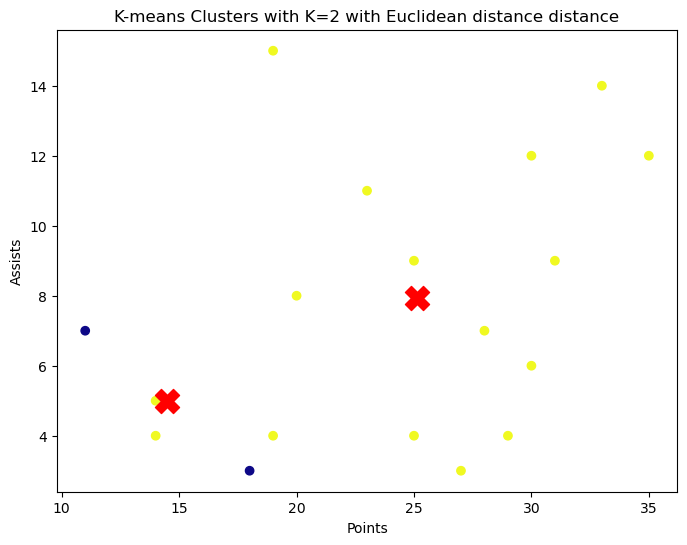

[[18.  3. 15.]
 [19.  4. 14.]
 [31.  9.  4.]]
[array([14.5,  5. , 14.5]), array([16.75,  5.25, 11.25]), array([27.91666667,  8.83333333,  6.75      ])]


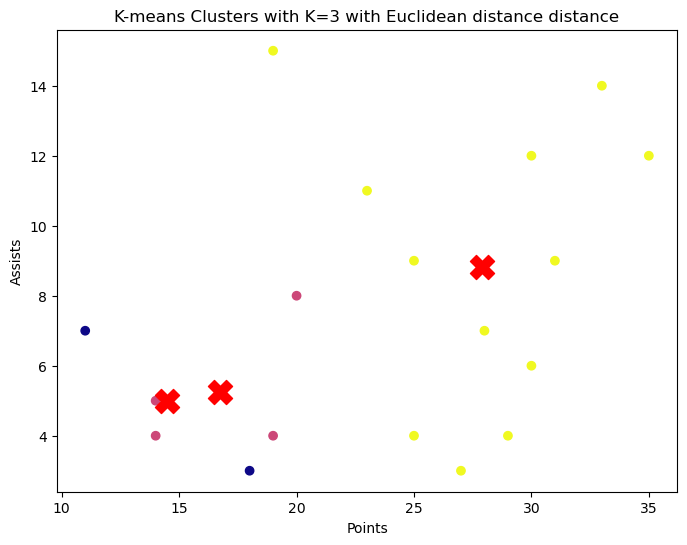

[[18.  3. 15.]
 [19.  4. 14.]
 [31.  9.  4.]
 [20.  8. 13.]]
[array([14.5,  5. , 14.5]), array([15.66666667,  4.33333333, 10.66666667]), array([28.72727273,  8.27272727,  6.81818182]), array([19.5, 11.5,  9.5])]


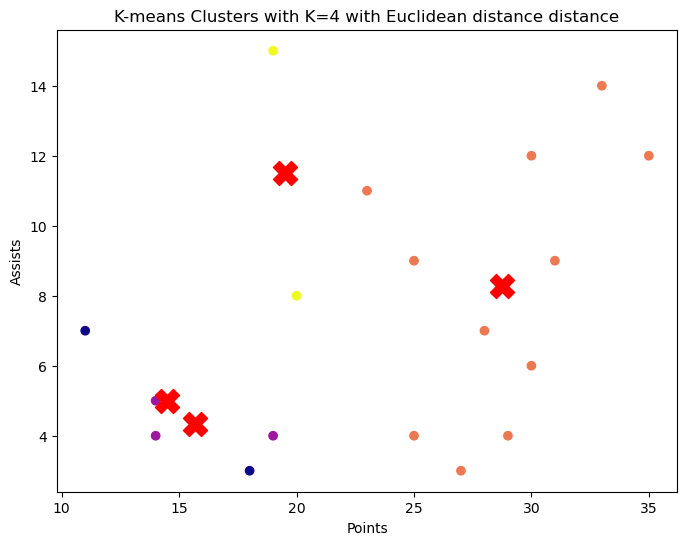

SSE values are [1347.5000000000002, 1053.4375, 580.0833333333334, 472.49999999999994]


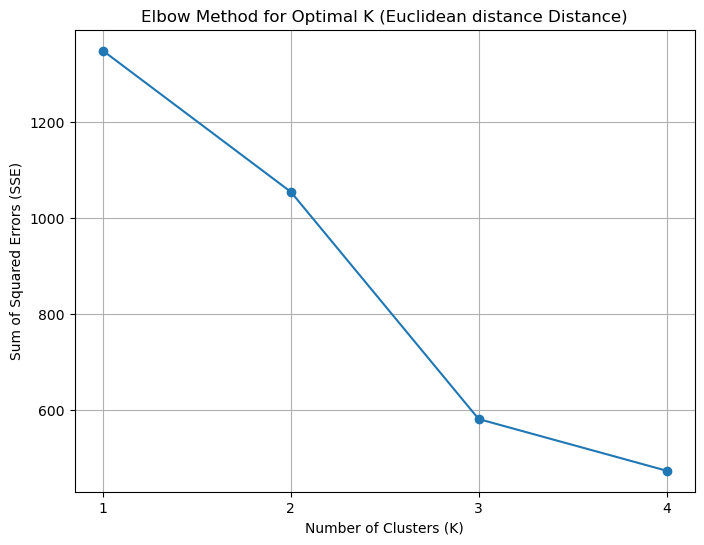

In [28]:
k_values=range(1,5)

elbow_method(data,k_values,euclidean_dis,'Euclidean distance')